# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [3]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [4]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
countries = online_rt.groupby('Country').sum()
countries = countries.sort_values(by='Quantity', ascending=False)
countries = countries[countries.index != 'United Kingdom'].head(10)
countries

,Quantity,UnitPrice,CustomerID
Country,,,
Netherlands,200128,6492.55,34190538.0
EIRE,142637,48447.19,110391745.0
Germany,117448,37666.00,120075093.0
France,110480,43031.99,107648864.0
Australia,83653,4054.75,15693002.0
Sweden,35637,1806.83,6790083.0
Switzerland,30325,6813.69,23775916.0
Spain,26824,12633.45,32689291.0
Japan,25218,814.86,4567292.0


<AxesSubplot:xlabel='Country'>

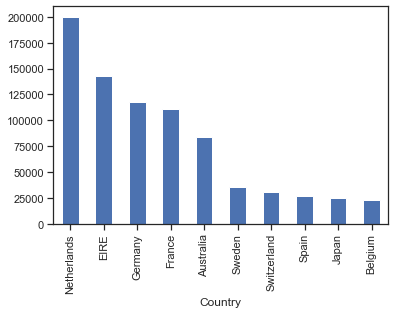

In [17]:
countries.Quantity.plot(kind='bar')

### Step 5.  Exclude negative Quantity entries

In [20]:
online_rt = online_rt[online_rt['Quantity'] >= 0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [28]:
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)

In [29]:
customers

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12346.0,United Kingdom,74215,1.04,United Kingdom
12347.0,Iceland,2458,481.21,Iceland
12348.0,Finland,2341,178.71,Finland
12349.0,Italy,631,605.10,Italy
12350.0,Norway,197,65.30,Norway
...,...,...,...,...
18280.0,United Kingdom,45,47.65,United Kingdom
18281.0,United Kingdom,54,39.36,United Kingdom
18282.0,United Kingdom,103,62.39,United Kingdom


In [30]:
top_countries = ['Netherlands', 'EIRE', 'Germany']

In [32]:
customers = customers[customers.Country.isin(top_countries)]

In [33]:
customers

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12426.0,Germany,258,118.09,Germany
12427.0,Germany,533,142.26,Germany
12468.0,Germany,366,133.57,Germany
12471.0,Germany,8212,1978.17,Germany
12472.0,Germany,4148,812.81,Germany
...,...,...,...,...
14016.0,EIRE,2125,635.88,EIRE
14156.0,EIRE,57885,5357.68,EIRE
14335.0,Germany,379,144.24,Germany


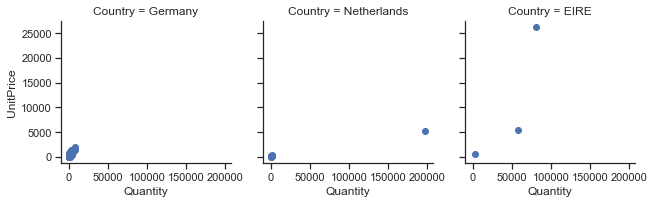

In [34]:
g = sns.FacetGrid(customers, col='Country')
g.map(plt.scatter, 'Quantity', 'UnitPrice', alpha=1)
g.add_legend()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [37]:
customers = online_rt.groupby(['CustomerID','Country']).sum().head()
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [41]:
print(customers.UnitPrice.dtype)

float64


##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [43]:
display(online_rt[online_rt.CustomerID == 12347.0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [44]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [45]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [46]:
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

C:\Users\lst_b\AppData\Local\Temp\ipykernel_5676\1406675421.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


##### Step 7.3.3 Plot

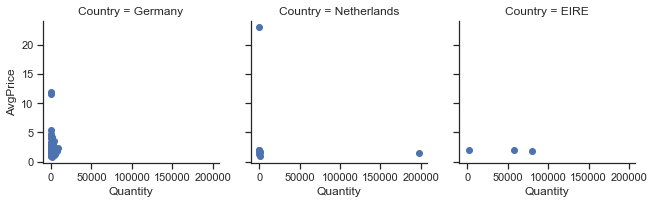

In [47]:
# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

C:\Users\lst_b\AppData\Local\Temp\ipykernel_5676\3417050252.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


[]

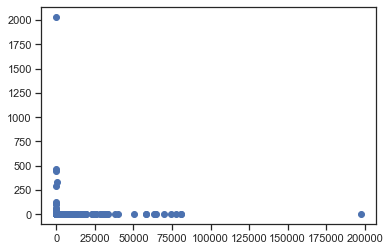

In [48]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()


##### Step 7.4.2 Zoom in so we can see that curve more clearly

[]

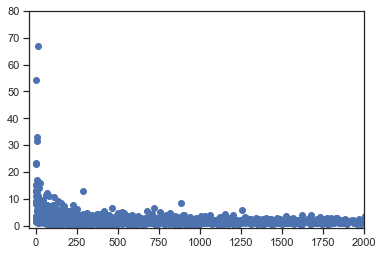

In [49]:
grouped = online_rt.groupby(['CustomerID', 'Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvePrice'] = plottable.Revenue / plottable.Quantity

plt.scatter(plottable.Quantity, plottable.AvePrice)

plt.xlim(-40, 2000)
plt.ylim(-1, 80)

plt.plot()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [50]:
online_rt.UnitPrice.describe()

count    531285.000000
mean          3.857296
std          41.810047
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [51]:
price_start = 0
price_end = 50
price_interval = 1

buckets = np.arange(price_start, price_end, price_interval)

revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).sum()
display(revenue_per_price)

,Quantity,UnitPrice,CustomerID,Revenue
UnitPrice,,,,
"(0, 1]",2123919,69408.154,1.422349e+09,1107774.544
"(1, 2]",1841466,208448.120,1.802621e+09,2691765.110
"(2, 3]",837931,251782.450,1.202749e+09,2024143.090
"(3, 4]",243381,138683.970,3.849589e+08,865101.780
"(4, 5]",269647,249022.520,4.955646e+08,1219377.050
"(5, 6]",68226,110296.030,1.518510e+08,391001.440
"(6, 7]",40356,46196.030,8.612938e+07,268922.630
"(7, 8]",39984,99367.660,1.349297e+08,306205.230
"(8, 9]",45187,136255.100,1.581570e+08,380043.780


#### 8.3 Plot.

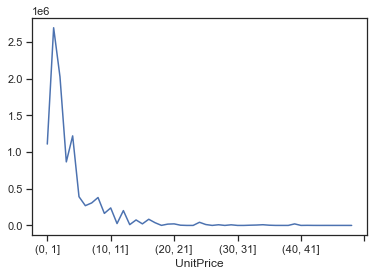

In [52]:
revenue_per_price = revenue_per_price.Revenue
revenue_per_price.plot()
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

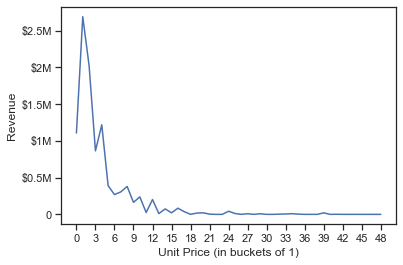

In [55]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')')
plt.ylabel('Revenue')

plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

### BONUS: Create your own question and answer it.